# Part I - Prosper Loan Data
## by Edgar Palacios

## Introduction
> This document explores a data set from Propser that contains 113,937 loans and attributes.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
# Load dataset in df
df = pd.read_csv('prosperLoanData.csv')

In [4]:
df.shape

(113937, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
df.isna().any()

ListingKey                             False
ListingNumber                          False
ListingCreationDate                    False
CreditGrade                             True
Term                                   False
LoanStatus                             False
ClosedDate                              True
BorrowerAPR                             True
BorrowerRate                           False
LenderYield                            False
EstimatedEffectiveYield                 True
EstimatedLoss                           True
EstimatedReturn                         True
ProsperRating (numeric)                 True
ProsperRating (Alpha)                   True
ProsperScore                            True
ListingCategory (numeric)              False
BorrowerState                           True
Occupation                              True
EmploymentStatus                        True
EmploymentStatusDuration                True
IsBorrowerHomeowner                    False
CurrentlyI

### Explore Credit Grade

In [7]:
df.CreditGrade.unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [8]:
df.CreditGrade.isna().value_counts(normalize=True)

True     0.745886
False    0.254114
Name: CreditGrade, dtype: float64

In [9]:
df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

### Explore Loan Status

In [10]:
df.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [11]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

### Explore Numeric Prosper Rating

In [12]:
df['ProsperRating (numeric)'].unique()

array([ nan,   6.,   3.,   5.,   2.,   4.,   7.,   1.])

In [13]:
df['ProsperRating (numeric)'].isna().value_counts(normalize=True)

False    0.744736
True     0.255264
Name: ProsperRating (numeric), dtype: float64

In [14]:
df['ProsperRating (numeric)'].value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

### Explore Alpha Prosper Rating

In [15]:
df['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [16]:
df['ProsperRating (Alpha)'].isna().value_counts(normalize=True)

False    0.744736
True     0.255264
Name: ProsperRating (Alpha), dtype: float64

In [17]:
df['ProsperRating (Alpha)'].value_counts().sort_index()

A     14551
AA     5372
B     15581
C     18345
D     14274
E      9795
HR     6935
Name: ProsperRating (Alpha), dtype: int64

## Explore Debt to Income Ratio

In [18]:
df.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [19]:
df.DebtToIncomeRatio.isna().value_counts(normalize=True)

False    0.924923
True     0.075077
Name: DebtToIncomeRatio, dtype: float64

## Explore Open Monthly Payment

In [20]:
df.OpenRevolvingMonthlyPayment.describe()

count    113937.000000
mean        398.292161
std         447.159711
min           0.000000
25%         114.000000
50%         271.000000
75%         525.000000
max       14985.000000
Name: OpenRevolvingMonthlyPayment, dtype: float64

In [21]:
df.OpenRevolvingMonthlyPayment.isna().any()

False

### Clean Data

In [22]:
# Drop nans in columns of interest
#df_new.dropna(axis=0, subset=['CreditGrade','DebtToIncomeRatio'], inplace=True)
#df_new.reset_index(inplace=True)

In [23]:
# Check for nans in columns of interest
#df_new[['CreditGrade','DebtToIncomeRatio','ProsperRating (numeric)']].isna().any()

## Convert Datatypes

In [24]:
ordinal_var_dict = {'CreditGrade': ['AA','A','B','C','D','E','HR'],
                    'ProsperRating (numeric)': [1,2,3,4,5,6,7],
                    'ProsperRating (Alpha)': ['AA','A','B','C','D','E','HR']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [25]:
df.dtypes

ListingKey                               object
ListingNumber                             int64
ListingCreationDate                      object
CreditGrade                            category
Term                                      int64
LoanStatus                               object
ClosedDate                               object
BorrowerAPR                             float64
BorrowerRate                            float64
LenderYield                             float64
EstimatedEffectiveYield                 float64
EstimatedLoss                           float64
EstimatedReturn                         float64
ProsperRating (numeric)                category
ProsperRating (Alpha)                  category
ProsperScore                            float64
ListingCategory (numeric)                 int64
BorrowerState                            object
Occupation                               object
EmploymentStatus                         object
EmploymentStatusDuration                

In [26]:
df_new = df.copy()

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in identifying the best features for predicting customers that will default on their loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that credit rating (credit grade, propser ratings) and personal financial health metrics such as debt-to-income ratio, open monthly payments and bank card utilization.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### What is the proportion of loans that have defaulted?
This bar plot will give us an general idea of the proportion of loans that have defaulted.

In [27]:
df.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

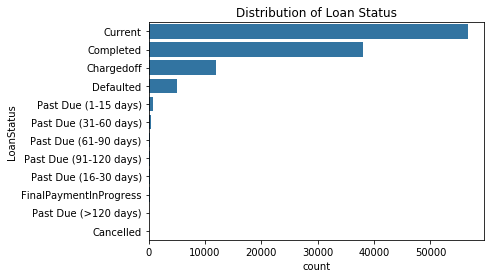

In [28]:
counts = df.LoanStatus.value_counts().index
sb.countplot(data=df, y='LoanStatus', 
             order=counts, color = sb.color_palette()[0])
plt.title('Distribution of Loan Status');

>Since the majority of counts come from 4 out of 12 categories of loan statuses another plot is created focusing on the top 4.  This will allow for improved visualization of the defaulted category.

In [29]:
col_vars = ['Completed','Chargedoff','Defaulted','Cancelled']
status_df = df[df.LoanStatus.isin(col_vars)]

In [30]:
status_df.LoanStatus.value_counts(normalize=True)

Completed     0.691136
Chargedoff    0.217684
Defaulted     0.091089
Cancelled     0.000091
Name: LoanStatus, dtype: float64

In [31]:
def annotate_bars(counts):
    # This function adds counts to each bar in a bar plot
    
    # Logic to print value on each bar
    for i in range(counts.shape[0]):
        count = counts[i]
        plt.text(i, count-200, count, ha = 'center', va='top', color='w')

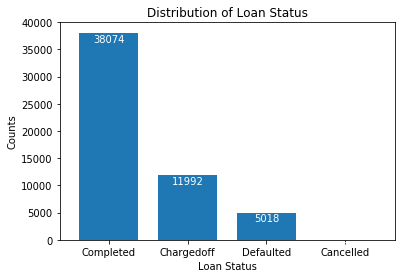

In [32]:
counts = status_df.LoanStatus.value_counts()

status_df.LoanStatus.value_counts().plot(kind='bar', width=.75, 
                                         color = sb.color_palette()[0])
plt.xticks(rotation=0)
plt.xlabel('Loan Status')
plt.ylabel('Counts')
plt.title('Distribution of Loan Status');

annotate_bars(counts)

> The top four loan status categories include 'Completed','Chargedoff','Defaulted' and Cancelled.  Of all the loans provided, 69% were completed while 9.1% had defaulted.

### What is the distribution of credit grades amonst the loans?
This visualization will give us a general idea of the distributions of credit grades.

In [33]:
counts = df.CreditGrade.value_counts().sort_index()

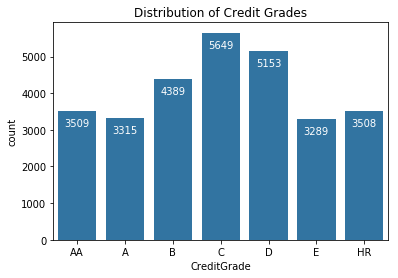

In [34]:
sb.countplot(data=df, x='CreditGrade', color = sb.color_palette()[0])
plt.title('Distribution of Credit Grades');

annotate_bars(counts)

> The credit grade distribution is unimodal with a peak at grade 'C'. 

### What is distribution of Prosper Ratings?
This visualization will give us a general idea of the prosper ratings distribution.

In [35]:
counts = df['ProsperRating (Alpha)'].value_counts()

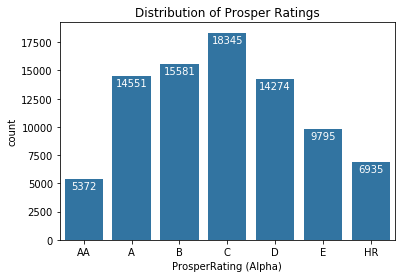

In [36]:
sb.countplot(data=df, x='ProsperRating (Alpha)', color=sb.color_palette()[0])
plt.title('Distribution of Prosper Ratings')

annotate_bars(counts)

> The distribution is different from the credit grade rating system.  Although the mode is the same (C), the distribution shows a positive skew. The change in counts from AA to A showed a sharp increase in counts potentially indicating that the loan applicant population with a AA credit grade is small.

### What is the distribution of Debt To Income (DTI) Ratio?
This visualization will show the distribution of Debt-To-Income Ration among the entire dataset.

In [37]:
# Check proportion of missing values
df.DebtToIncomeRatio.isna().value_counts(normalize=True)

False    0.924923
True     0.075077
Name: DebtToIncomeRatio, dtype: float64

In [38]:
dti_df = df.dropna(axis=0, subset=['DebtToIncomeRatio'])

In [39]:
dti_df.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [40]:
bins = np.arange(0, 2,.025)

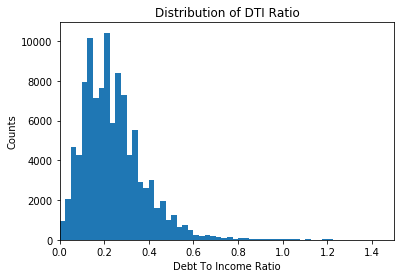

In [41]:
plt.hist(data=dti_df, x='DebtToIncomeRatio', bins =bins)
plt.xlim([0,1.5])
plt.ylabel('Counts')
plt.xlabel('Debt To Income Ratio')
plt.title('Distribution of DTI Ratio');

> Because the plot reveals a slight positive skew in Debt-To-Income (DTI) ratio, the data is plotted in log scale to explore distributions at higher DTI ratios. 

In [42]:
np.log10(dti_df.DebtToIncomeRatio.describe())

count    5.022771
mean    -0.559175
std     -0.258251
min          -inf
25%     -0.853872
50%     -0.657577
75%     -0.494850
max      1.000434
Name: DebtToIncomeRatio, dtype: float64

In [43]:
bins = 10**(np.arange(0.001,1,.025))

xticks = np.logspace(0.001, 1, 5) # create a log space array from min - max of log10(DTI)
xlabels = np.round_(np.log10(xticks),2).astype(str) # create xlabels

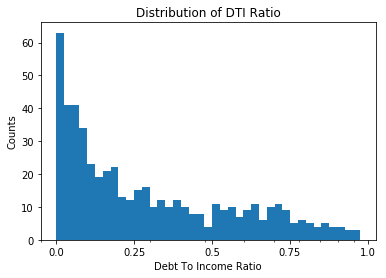

In [44]:
plt.hist(data=dti_df, x='DebtToIncomeRatio', bins = bins)
plt.xscale('log')
plt.xticks(xticks, xlabels)
plt.ylabel('Counts')
plt.xlabel('Debt To Income Ratio')
plt.title('Distribution of DTI Ratio');

> When plotted on a standard scale, the distribution appears unimodal with a large positive skew.  After plotting on a log scale, it does seem to be a better way of plotting the variable since it exaggerates the long DTI ratio tail. 

### What is the distribution of open revolving monthly payments (ORMP)?

This following visualization will show the distribution of open revolving monthly payments.

In [45]:
df.OpenRevolvingMonthlyPayment.describe()

count    113937.000000
mean        398.292161
std         447.159711
min           0.000000
25%         114.000000
50%         271.000000
75%         525.000000
max       14985.000000
Name: OpenRevolvingMonthlyPayment, dtype: float64

In [46]:
bins = np.arange(0, 1500,50)

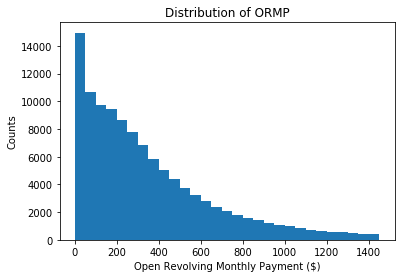

In [47]:
plt.hist(data=df, x='OpenRevolvingMonthlyPayment', bins = bins)
plt.xlabel('Open Revolving Monthly Payment ($)')
plt.title('Distribution of ORMP')
plt.ylabel('Counts');

> Because the plot reveals a large positive skew in open revolving monthly paymets (ORMP), the data is plotted in log scale to explore distributions at higher ORMPs.

In [48]:
np.log10(df.OpenRevolvingMonthlyPayment.describe())

count    5.056665
mean     2.600202
std      2.650463
min          -inf
25%      2.056905
50%      2.432969
75%      2.720159
max      4.175657
Name: OpenRevolvingMonthlyPayment, dtype: float64

In [49]:
bins = 10**(np.arange(0.001,4.8,.1))

xticks = np.logspace(0.001, 4.8, 7)
xlabels = xticks.astype(int)

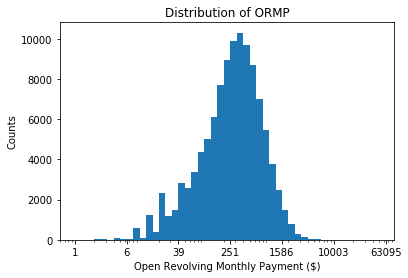

In [50]:
plt.hist(data=df, x='OpenRevolvingMonthlyPayment', bins = bins)
plt.xlabel('Open Revolving Monthly Payment ($)')
plt.ylabel('Counts')
plt.title('Distribution of ORMP')
plt.xscale('log')
plt.xticks(xticks,xlabels);

> When plotting a standard scale ORMP shows a strong positive skew.  Plotting on a log scale showed much more interpretable results.  The distribution exhibited a normal distribution centered at ~$400 with a slight negative skew.

### What is the distribution of Bank Card Utilization?
The following visualizations explore distribution of bank card utilization since it is expected to have an impact on default.

In [51]:
#Check for missing values
df.BankcardUtilization.isna().value_counts(normalize=True)

False    0.933261
True     0.066739
Name: BankcardUtilization, dtype: float64

In [52]:
#drop missing values
bcu_df = df.dropna(subset=['BankcardUtilization'])

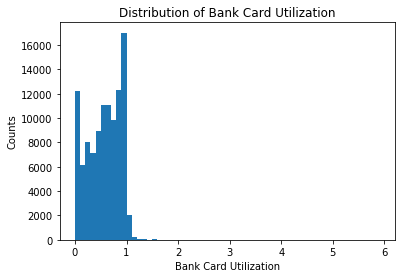

In [53]:
plt.hist(data=bcu_df, x='BankcardUtilization', bins=np.arange(0,6,.1))
plt.xlabel('Bank Card Utilization')
plt.ylabel('Counts')
plt.title('Distribution of Bank Card Utilization');

> Because the plot does not reveal a usual distribution the data is plotted in log scale.

In [54]:
np.log10(bcu_df.BankcardUtilization.describe())

count    5.026668
mean    -0.250798
std     -0.497685
min          -inf
25%     -0.508638
50%     -0.221849
75%     -0.075721
max      0.774517
Name: BankcardUtilization, dtype: float64

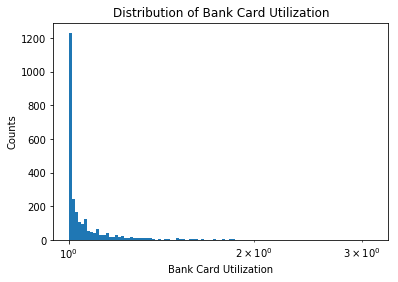

In [55]:
bins = 10**np.arange(0,.5,0.005)

plt.hist(data=bcu_df, x='BankcardUtilization', bins=bins)
plt.xscale('log')
plt.xlabel('Bank Card Utilization')
plt.ylabel('Counts')
plt.title('Distribution of Bank Card Utilization');

> When plotting on a standard scale the distribution was unusual.  On a log scale, however, the distribution is peaked near zero then falls off in a rapid asymptotic manner generating a long positive skew.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - Top-Five loan status by counts were completed, chargedoff, defaulted and cancelled - respectively. 
- Prosper (alpha) and credit grade rating systems were similar.  Both exhibited unimodal distributions with a peak at a credit score of "C".  
- Debt-To-Income Ratio showed positive skew with a peak at ~0.2.
- Open revolving monthly payments shows a unimodal distribution with a negative skew appearing to be centered at ~$400.
- Bank card utilization shows a long positive skew with peak near zero.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - No unusual distributions were found.  
- Operations conducted consisted of dropping rows with missing variables (Debt-To-Income Ratio) and limiting categories (Loan Status).
- Transformations had to be included for ORMP.  

## Bivariate Exploration

### Bank Card Utilization
Since credit ratings are important in determining credit worthiness the following visualizations explore the relationship between bank card utilization and two similar rating systems (credit grade and prosper rating (alpha)).

In [56]:
#Check for missing values
df.BankcardUtilization.isna().value_counts(normalize=True)

False    0.933261
True     0.066739
Name: BankcardUtilization, dtype: float64

In [57]:
#drop missing values
bcu_df = df.dropna(subset=['BankcardUtilization'])

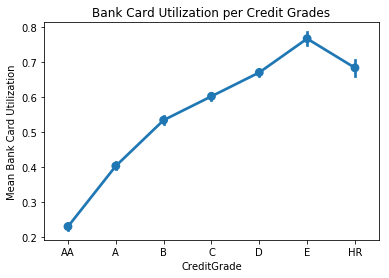

In [58]:
sb.pointplot(data=bcu_df, x='CreditGrade',y='BankcardUtilization')
plt.ylabel('Mean Bank Card Utilization')
plt.title('Bank Card Utilization per Credit Grades');

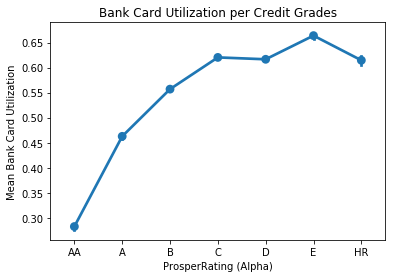

In [59]:
sb.pointplot(data=bcu_df, x='ProsperRating (Alpha)',y='BankcardUtilization')
plt.ylabel('Mean Bank Card Utilization')
plt.title('Bank Card Utilization per Credit Grades');

> The previous two visualizations show  slightly larger credit  utilization values when using credit grade as the rating system. In both cases, however, bank card utilization shows a positive correlation with lower credit ratings.  If higher credit ratings show lower bank card utilization does that somehow correlate to completion of defaulting of loans? To explore this loan status is plotted against bank card utilization.

In [60]:
bcu_new= bcu_df[bcu_df.LoanStatus.isin(col_vars)]

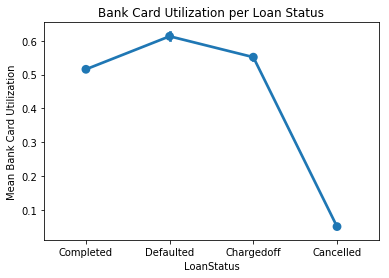

In [61]:
sb.pointplot(data=bcu_new, x='LoanStatus',y='BankcardUtilization')
plt.ylabel('Mean Bank Card Utilization')
plt.title('Bank Card Utilization per Loan Status');

> Interestingly, the mean bank card utilization of completed loans is above 50%.  This means completed loans must have been given to lower credit score holders.  This begs the question of what is the distribution of credit scores for each loan status?

### How are credit scores distrubuted within each loan status category?

The following visualization will compare two credit ratings systems (Credit grade and loan status) to analyze the distribution of credit scores within each loan status category. We start with using facet grids for Credit Grade.

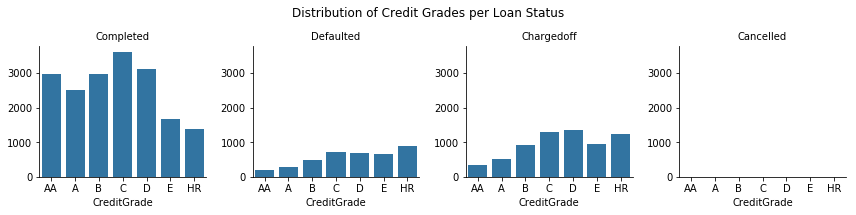

In [62]:
g = sb.FacetGrid(data=status_df, col='LoanStatus', sharey=True)
g.map(sb.countplot,'CreditGrade')
g.set_titles('{col_name}')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Credit Grades per Loan Status');

>Although the facet grid shows the distributions well, bringing the data together in a clustered bar may make it easier to compare categorical data.

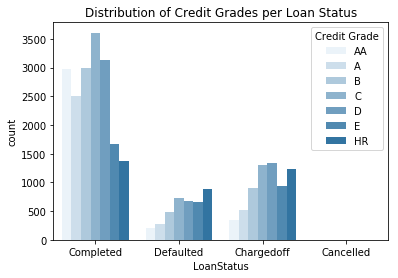

In [63]:
sb.countplot(data=status_df, x='LoanStatus', hue='CreditGrade',
             color=sb.color_palette()[0])
plt.legend(title='Credit Grade',loc=1)
plt.title('Distribution of Credit Grades per Loan Status');

> Since the clustered bar chart is easier to interpret accurately the same visualization is created for the prosper ratings (alpha) to compare.

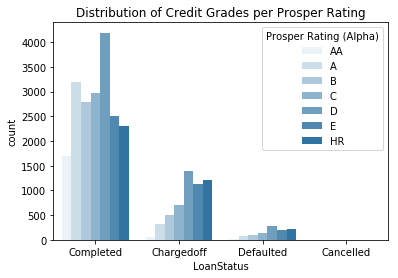

In [64]:
sb.countplot(data=status_df, x='LoanStatus', hue='ProsperRating (Alpha)',
             color=sb.color_palette()[0], order=col_vars)
plt.legend(title='Prosper Rating (Alpha)',loc=1)
plt.title('Distribution of Credit Grades per Prosper Rating');

> In the completed category the counts trended lower with decreasing credit ratings.  However, for chargedoff and defaulted categories, the counts trended higher with decreasing rating.

### Does Loan status have an observable relationship to DTI ratio?
DTI ratio is also a known factor in credit scores so the following visualization explores the mean values and confidence intervales of DTI ratio for each loan status category.

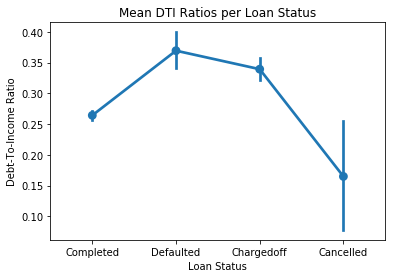

In [65]:
sb.pointplot(data=status_df, x='LoanStatus',y='DebtToIncomeRatio', 
           color = sb.color_palette()[0])
plt.xlabel('Loan Status')
plt.ylabel('Debt-To-Income Ratio')
plt.title('Mean DTI Ratios per Loan Status');

> Since the pointplot only offers an aggregated value of DTI the distribution of DTI for each category is also explored.

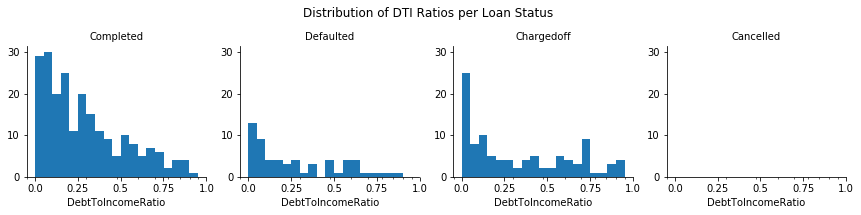

In [66]:
bins = 10**(np.arange(0.001,1,.05))

xticks = np.logspace(0.001, 1, 5) 
xlabels = np.round_(np.log10(xticks),2).astype(str)

g = sb.FacetGrid(data=status_df, col='LoanStatus')
g.map(plt.hist, 'DebtToIncomeRatio', bins=bins)
g.set_titles('{col_name}')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of DTI Ratios per Loan Status')

plt.xscale('log')
plt.xticks(xticks,xlabels);


> Mean DTI ratio was below 30% for completed loans whereas defaulted and charged off loans had mean DTI ratios above 30%.

### Does Loan status have an observable relationship to ORMP?
Having a higher ORMP indicates higher financial burden so it is visualized against loan status to see if defaults or charge offs had higher ORMPs.

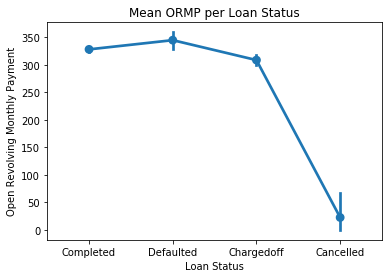

In [67]:
sb.pointplot(data=status_df, x='LoanStatus', y='OpenRevolvingMonthlyPayment', 
           color=sb.color_palette()[0])
plt.ylabel('Open Revolving Monthly Payment')
plt.xlabel('Loan Status')
plt.title('Mean ORMP per Loan Status');

> ORMP does not seem to demonstrate differeneces in mean ORMP values for completed, defaulted and chargedoff loans - all between $300-350.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - Bank card utilization showed a positve correlation with lower credit grades.
- Completed loans showed a positive correlation with lower credit ratings while  defaulted and charged-off loans showed the inverse relationship.
- Both defaulted and charged-off loans showed debt-to-income ratios above 30% while completed loans were below (~26%).  
- Open revolving credit mothly payment does not show a significant difference amongst loan status categories.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, there was a significant lack of correlation or trend between open revolving mothly payment and loan status.  It was anticipated that the open revolving monthly payments increased loan completion would be much less likely.

## Multivariate Exploration

### Does debt-to-income vary for loan status and credit grade?
From previous graphs we know DTI ratio on average is higher for defaulted and charged-off loans but it is unclear how that varies across credit scores.  Since prosper and credit grade scores are similar, credit grade was arbitrarily chosen as the credit ranking system.

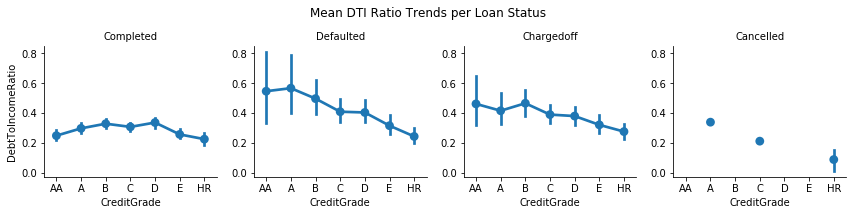

In [68]:
g = sb.FacetGrid(data = status_df, col='LoanStatus', sharey=True)
g.map(sb.pointplot, 'CreditGrade', 'DebtToIncomeRatio')
g.set_titles('{col_name}')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Mean DTI Ratio Trends per Loan Status');

> In the case of defaulted and charged-off loans, DTI trends down with decreasing credit rating.  This is assumed to be because loan holders with better credit scores tend to recieve high loan amounts.  To check this we plot available bank credit against credit grade.

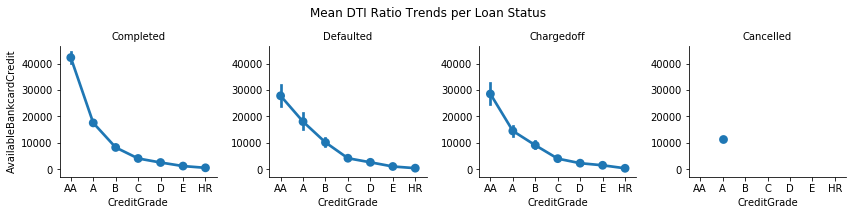

In [69]:
g = sb.FacetGrid(data = status_df, col='LoanStatus', sharey=True)
g.map(sb.pointplot, 'CreditGrade', 'AvailableBankcardCredit')
g.set_titles('{col_name}')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Mean DTI Ratio Trends per Loan Status');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - The multivariate exploration here shows there was no directional trend when observing completed loan data while 
- Opposite is true for defaulted and charged off loans.  This occurs because loan holders with better credit scores had large amounts of credit available.
- As credit grades increase, available bank card credit increases non-linearly.

### Were there any interesting or surprising interactions between features?

>  The most interesting observation here was that better credit scores had higher DTI ratios in the defaulted or charged-off loan categories.  This was unexpected since DTI ratios tended to be higher for lower credit scores and lower credit scores tended to default more.

## Conclusions
> Findings showed that in general, DTI and credit score was a good indicator of whether or not a loan holder would default. While most loans that were granted were completed (69%) an interesting observation was made showing that loan holders who defaulted and had higher credit scores also had significantly elevated DTI ratios.  This was unexpected considering that DTI vs Loan status visualization showed all mean DTI ratios below 40% for all loan status categories.  This indicates that the model used to grant loans may be allowing much higher DTI ratios for applicants with higher credit scores than their low credit score counterparts.  


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

